# **Diabetes Risk Predictor**

## Importing th dependencies

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Data collection and analysis

PIMA Diabetes dataset

In [76]:
#loading the dataset
diabetes_dataset = pd.read_csv("diabetes.csv")

EDA

In [77]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Pregnancies**

- What it means: How many times the woman has been pregnant

- Values: Whole numbers (0, 1, 2, 3,... up to 17)

**Glucose**

- What it means: Sugar level in blood (tested after 2 hours)

- Values: Numbers from 0 to 199 (normal is around 70-140)

**BloodPressure**

- What it means: Pressure in your blood vessels (diastolic)

- Values: Numbers from 0 to 122 (normal is around 60-80)

**SkinThickness**

- What it means: Thickness of skin fold at triceps (measures body fat)

- Values: Numbers from 0 to 99 (mm)

**Insulin**

- What it means: Amount of insulin in blood (2-hour serum insulin)

- Values: Numbers from 0 to 846 (μU/ml)

**BMI**

- What it means: Body Mass Index (weight/height ratio)

- Values: Numbers from 0 to 67.1 (normal is 18.5-24.9)

**DiabetesPedigreeFunction**

- What it means: How likely diabetes runs in family (genetic risk)

- Values: Decimal numbers from 0.078 to 2.42 (higher = more risk)

**Age**

- What it means: How old the person is (in years)

- Values: Whole numbers from 21 to 81

**Outcome**

- What it means: Has diabetes or not (what we're trying to predict)

- Values: 0 (no diabetes) or 1 (has diabetes)

In [78]:
diabetes_dataset.shape

(768, 9)

In [79]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [80]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [81]:
diabetes_dataset['Outcome'].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [82]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [83]:
diabetes_dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Observations:**

- There are a total of 768 records and 9 features in the dataset.
- Each feature can be either of integer or float dataype.
- Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data.
- There are zero NaN values in the dataset.

<Axes: xlabel='Outcome', ylabel='count'>

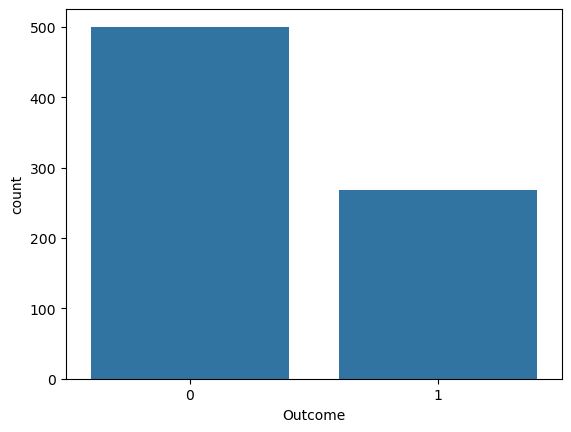

In [84]:
# Outcome countplot
sns.countplot(x = 'Outcome',data = diabetes_dataset)

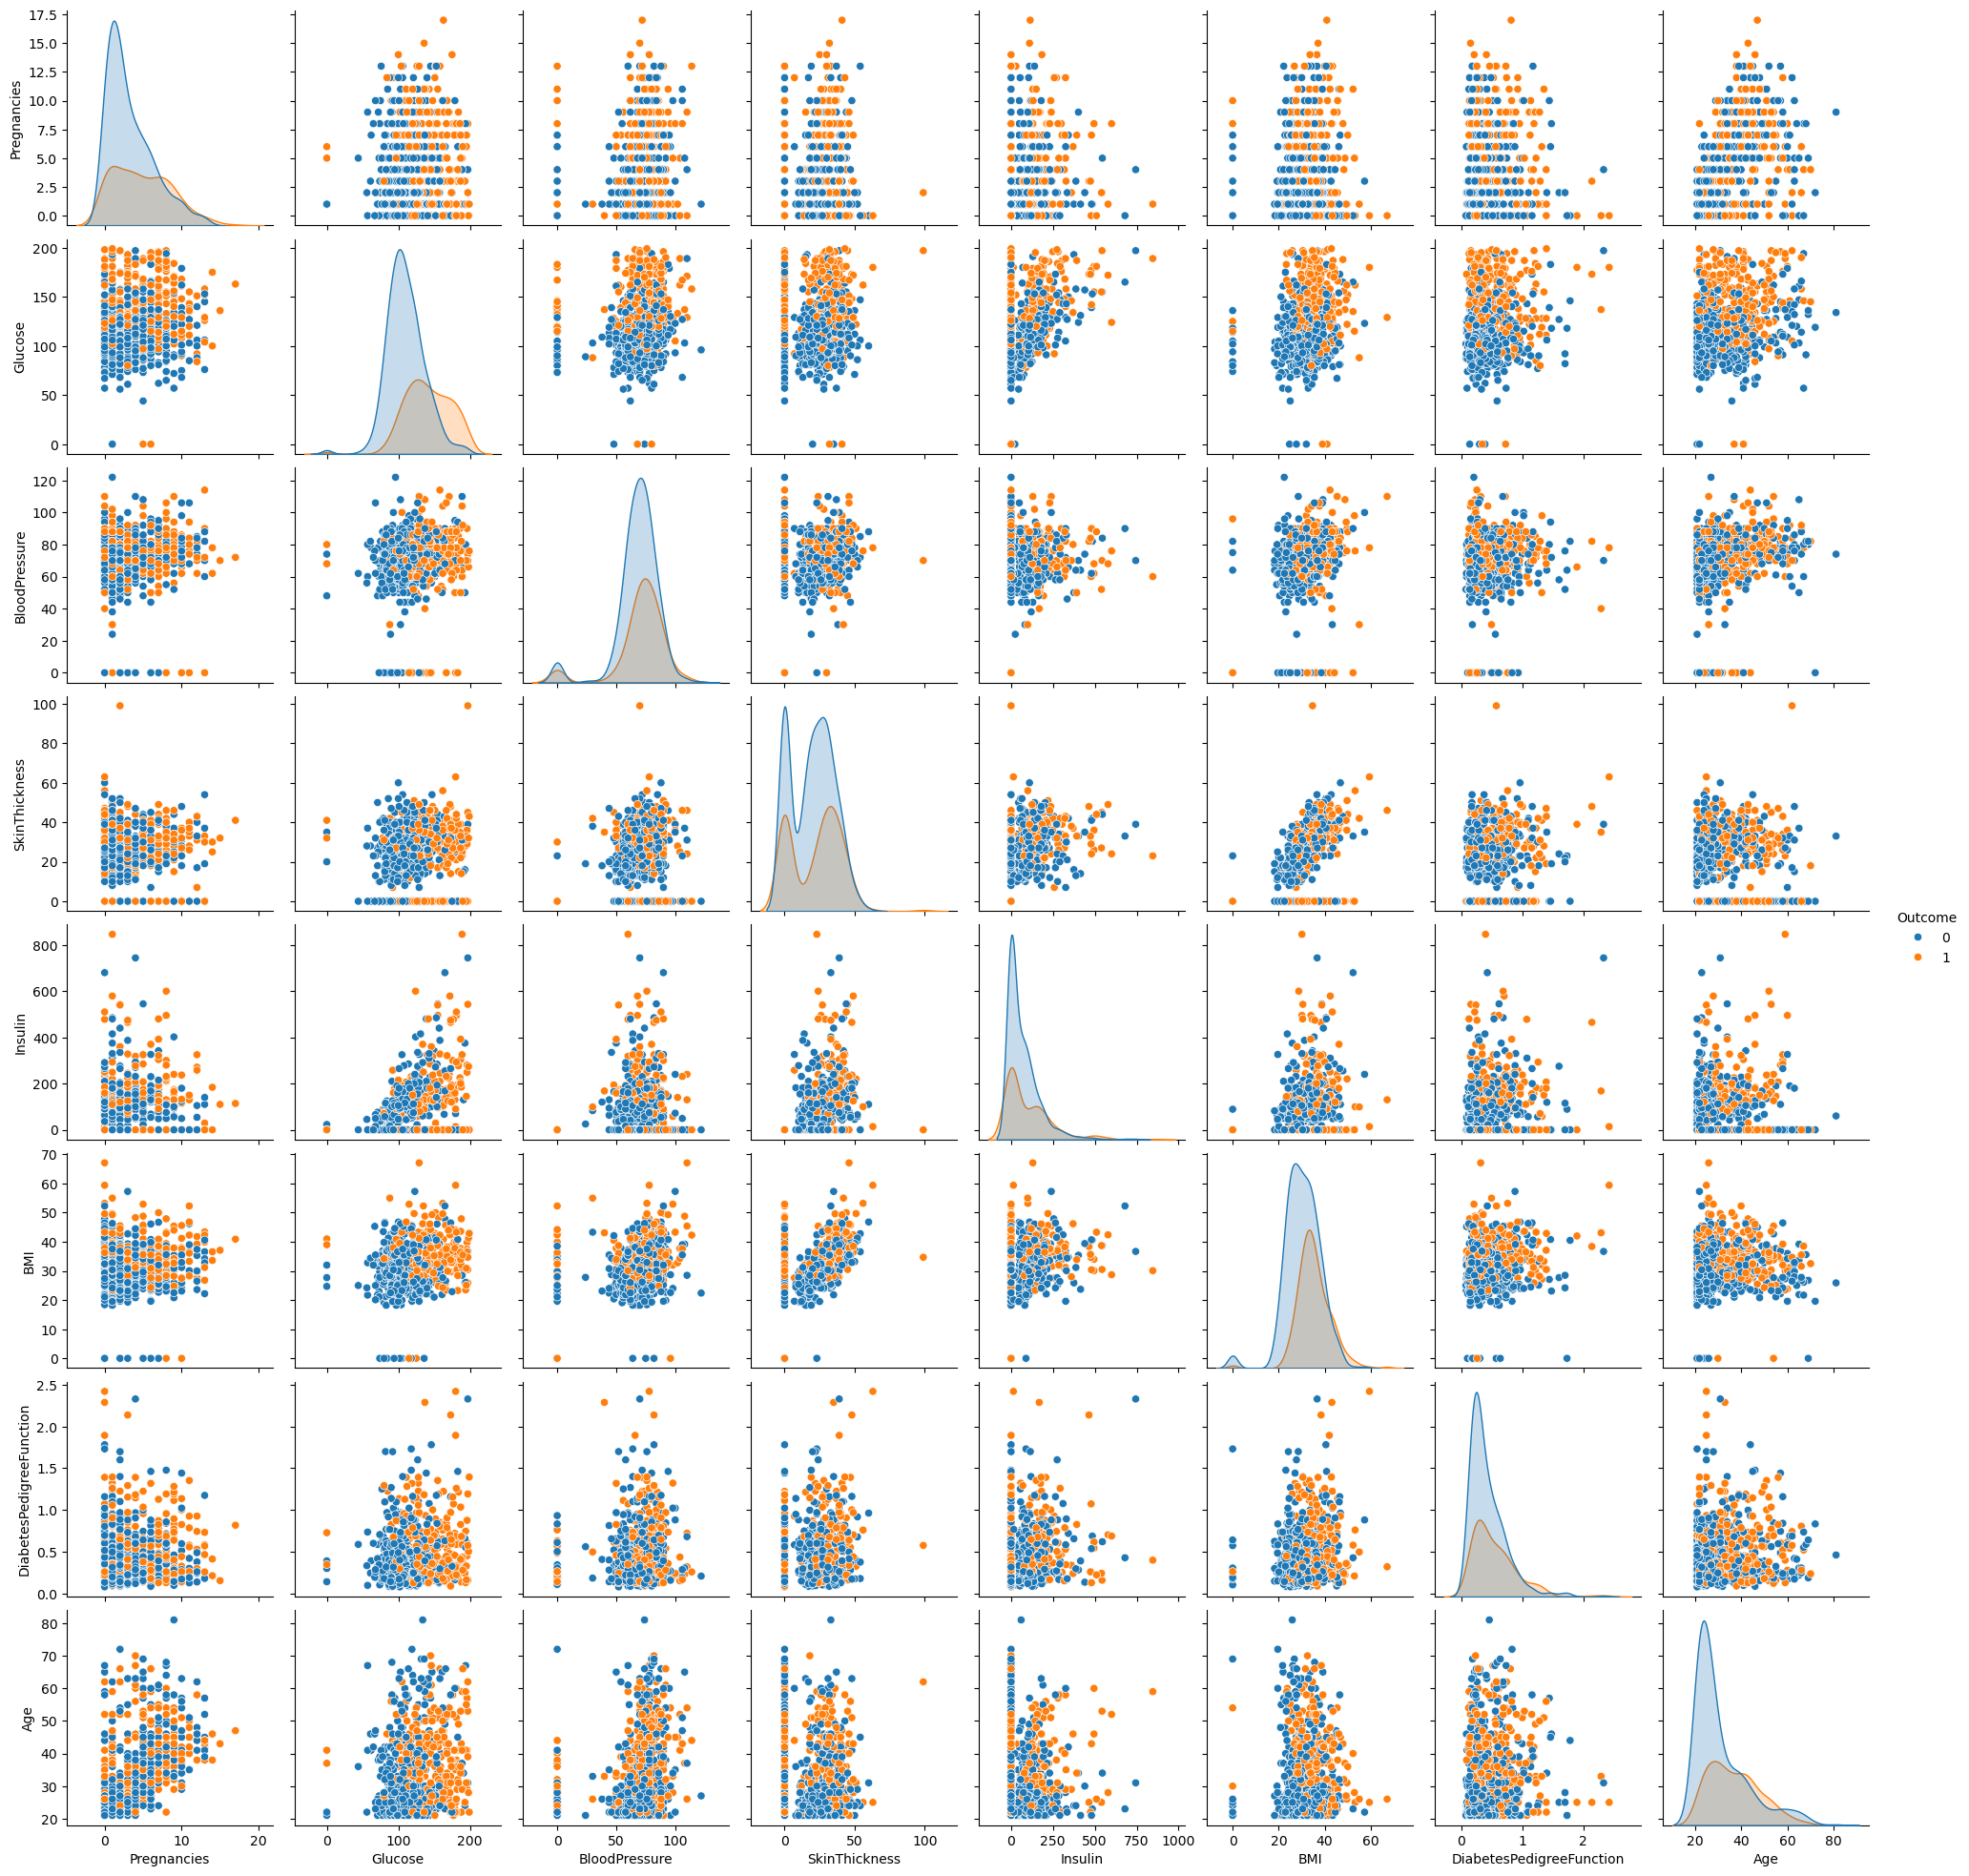

In [85]:
# Pairplot 
sns.pairplot(data = diabetes_dataset, hue = 'Outcome')
plt.show()

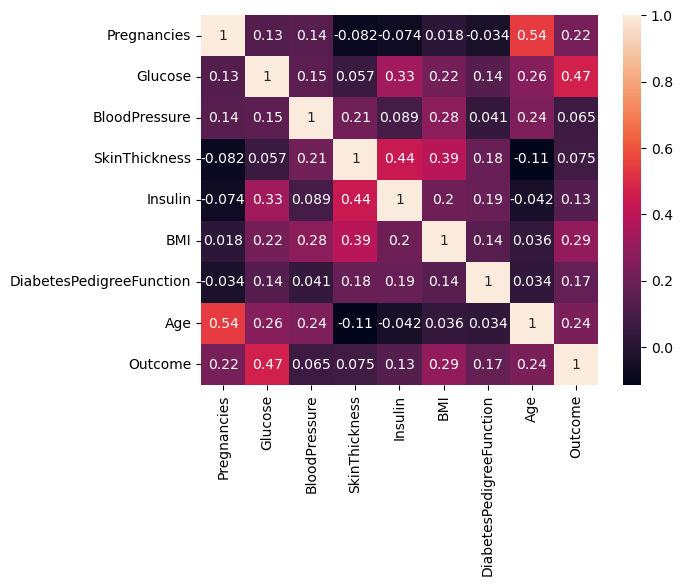

In [86]:
# Heatmap
sns.heatmap(diabetes_dataset.corr(), annot = True)
plt.show()

**Observations:**
- The countplot tells us that the dataset is imbalanced, as number of patients who don't have diabetes is more than those who do.
- From the correaltion heatmap, we can see that there is a high correlation between Outcome and [Glucose,BMI,Age,Insulin].

## Data Preprocessing

In [87]:
# columns where 0 
problem_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with median of each column
for col in problem_cols:
    median_val = diabetes_dataset[diabetes_dataset[col] != 0][col].median()
    diabetes_dataset[col] = diabetes_dataset[col].replace(0, median_val)

Why median over mean?
- Median is better for medical data because it ignores extreme values
- Mean could be skewed by very high insulin/glucose readings

### Handling imbalance data using SMOTE

In [91]:
# Separate features
X = diabetes_dataset.drop('Outcome', axis=1)
y = diabetes_dataset['Outcome']

# Create balanced dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

print(y_balanced.value_counts())

Outcome
1    500
0    500
Name: count, dtype: int64


What SMOTE Does:
- Creates artificial diabetic patient data (but smartly!)
- Makes equal numbers of diabetic and non-diabetic cases

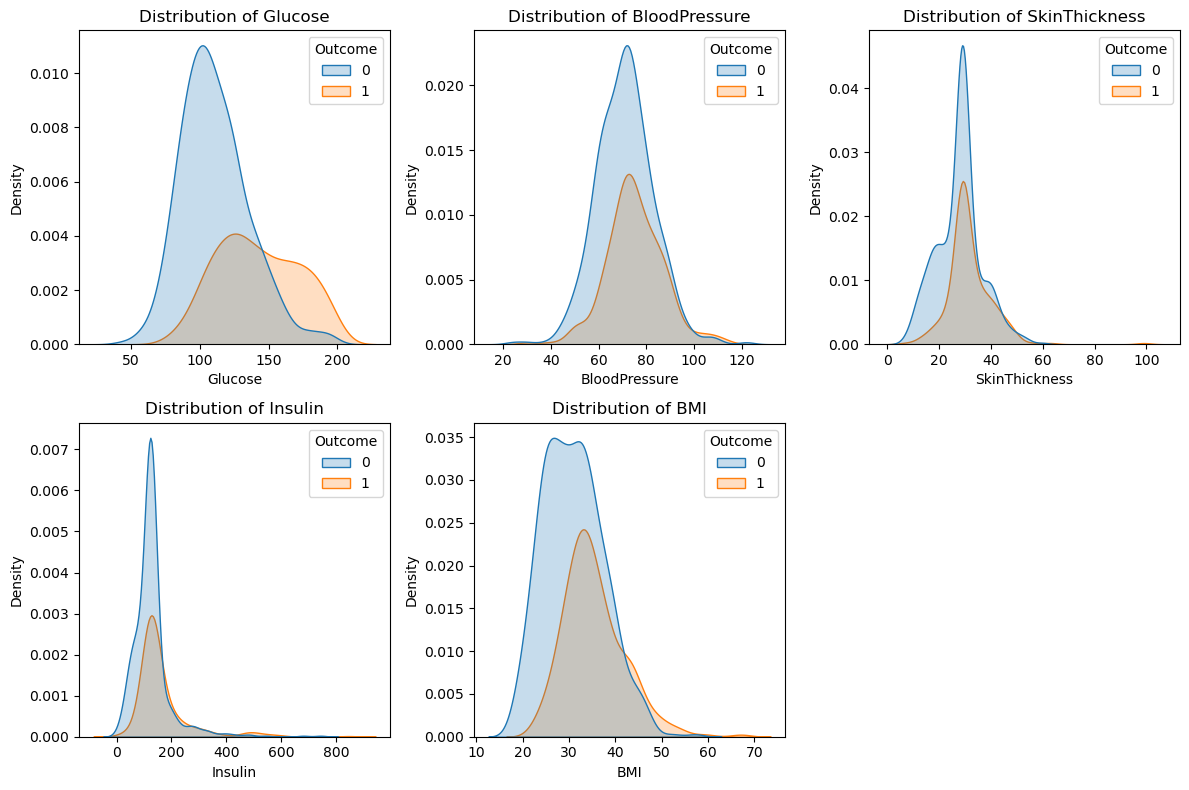

In [92]:
# Set up the figure
plt.figure(figsize=(12,8))

# Compare distributions for each feature
for i, col in enumerate(problem_cols):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(data=diabetes_dataset, x=col, hue='Outcome', fill=True)
    plt.title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()

In [ ]:
# Save the cleaned dataset
diabetes_dataset.to_csv('cleaned_diabetes_data.csv', index=False)

In [94]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [95]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


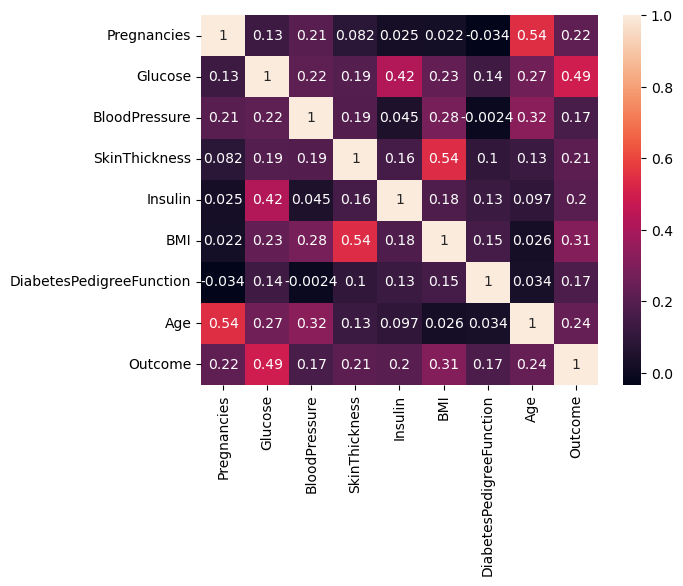

In [96]:
# Heatmap
sns.heatmap(diabetes_dataset.corr(), annot = True)
plt.show()

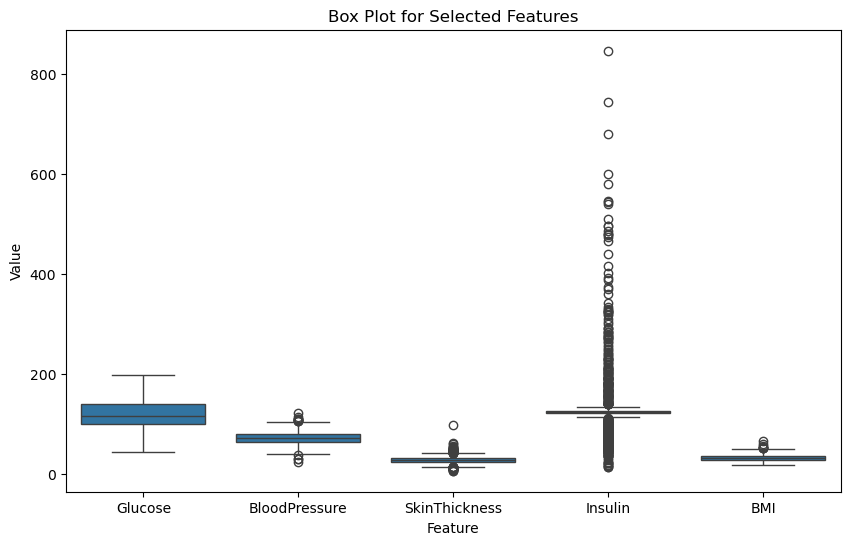

In [ ]:
# Convert to long format using melt
melted_data = diabetes_dataset[problem_cols].melt()

plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=melted_data)
plt.title('Box Plot for Selected Features')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()


In [260]:
#Separating the data and labels
X = diabetes_dataset.drop(columns=['Outcome'], axis=1)
y = diabetes_dataset['Outcome']

display(X)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,125,33.6,0.627,50
1,1,85,66,29,125,26.6,0.351,31
2,8,183,64,29,125,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,125,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,29,125,30.1,0.349,47


In [261]:
display(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Train Test Split (before scaling because to avoid data leakage)

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

Data scaling

In [263]:
scaler = RobustScaler()

- Uses median/IQR instead of mean/std (standardization) because it ignores extreme values common in medical data (e.g., insulin=846)

In [264]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [265]:
print(X_train_scaled)

[[-0.6         0.04878049  0.         ...  0.         -0.60427807
  -0.29411765]
 [ 0.6        -0.29268293 -0.13333333 ... -0.18028169 -0.65508021
   0.47058824]
 [-0.4         1.75609756 -0.8        ... -0.25915493  0.0828877
   1.76470588]
 ...
 [ 1.6        -0.7804878   0.13333333 ... -0.25915493 -0.17914439
   0.35294118]
 [ 0.2        -0.12195122  0.4        ...  0.78873239 -0.35026738
   0.52941176]
 [-0.6        -0.75609756 -0.26666667 ...  0.38309859 -0.34491979
  -0.23529412]]


In [266]:
X = X_train_scaled
y = diabetes_dataset['Outcome']

In [267]:
print(X.shape, X_train.shape, X_test.shape)

(614, 8) (614, 8) (154, 8)


## Choosing the best model

In [268]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

In [269]:
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    results[name] = scores.mean()

In [270]:
results_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values('Accuracy', ascending=False)
print(results_df)

                 Model  Accuracy
1                  SVM  0.771851
0  Logistic Regression  0.770279
3        Random Forest  0.765387
5          Naive Bayes  0.750753
2                  KNN  0.732800
4        Decision Tree  0.695295


### Plot the model comparison

In [271]:
fig = px.bar(data_frame= results_df, x="Model", y="Accuracy", color="Model", text_auto=True, title="Model Comparison").update_layout(yaxis = dict(range = [0.6, 0.8]))
fig.show()

- Top 3 models are very close
- SVC won by a tiny margin
- Decision Tree underperformed

## Training the model

### Support Vector Machine

In [272]:
classifier = svm.SVC(kernel= "linear", probability=True)

In [273]:
#Traininf the support vector machines classifier
classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True)

## Model Evaluation

Accuracy Score

In [274]:
#accuracy score on the training data
X_train_prediction = classifier.predict(X_train_scaled)

In [275]:
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [276]:
print("Accuracy score of training data: ", training_data_accuracy)

Accuracy score of training data:  0.7801302931596091


In [277]:
#accuracy score on the test data
X_test_prediction = classifier.predict(X_test_scaled)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [278]:
print("Accuracy score of test data: ", test_data_accuracy)

Accuracy score of test data:  0.7727272727272727


## Making a predictive system

In [279]:
diabetes_dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [283]:
input_data = (10,125,70,26,115,31.1,0.205,41)

input_df = pd.DataFrame([input_data], columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

#Convert input into scaled_data
scaled_data = scaler.transform(input_df)
print(scaled_data)

prediction = classifier.predict(scaled_data)
prediction_probability = classifier.predict_proba(scaled_data)

print("Prediction (0=No, 1=Yes):", prediction[0])
print("Probability [No, Yes]:", prediction_probability[0])
print(f"{prediction_probability[0][0]*100:.2f}% chance healthy, {prediction_probability[0][1]*100:.2f}% chance diabetic")

# Prediabetes Warning System
healthy_prob = prediction_probability[0][0] * 100
diabetic_prob = prediction_probability[0][1] * 100

if prediction[0] == 0 and diabetic_prob > 35:
    print("\n⚠️ Warning: You're in prediabetic range (35-50% risk)")
    print("Recommendations:")
    print("- Get HbA1c test for confirmation")
    print("- Reduce sugar/carb intake")
    print("- Increase physical activity")
elif prediction[0] == 1 and diabetic_prob < 50:
    print("\n⚠️ Warning: Borderline diabetic (50-65% confidence)")
else:
    print("\n✅ No prediabetes risk detected")

[[ 1.4         0.19512195 -0.13333333 -0.38709677 -0.93023256 -0.14647887
  -0.43315508  0.70588235]]
Prediction (0=No, 1=Yes): 0
Probability [No, Yes]: [0.58270192 0.41729808]
58.27% chance healthy, 41.73% chance diabetic

⚠️ Warning: You're in prediabetic range (35-50% risk)
Recommendations:
- Get HbA1c test for confirmation
- Reduce sugar/carb intake
- Increase physical activity


In [284]:
if prediction[0] == 0:
    print("The person is not diabetic")
else:
    print("The person is diabetic")

The person is not diabetic


In [282]:
test_data_confusion_matrix = confusion_matrix(X_test_prediction, y_test)
print(test_data_confusion_matrix)

[[91 26]
 [ 9 28]]


<Axes: >

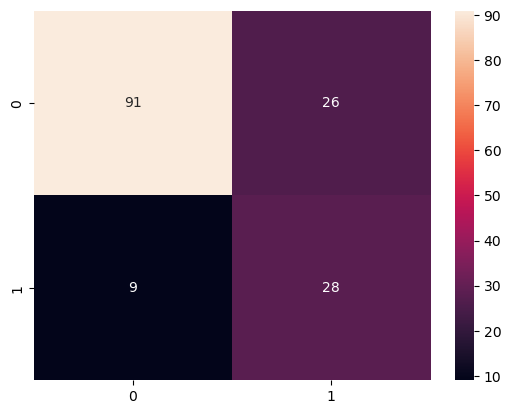

In [205]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(test_data_confusion_matrix), annot=True)

In [206]:
test_data_classification_report = classification_report(X_test_prediction, y_test)
print(test_data_classification_report)

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       117
           1       0.52      0.76      0.62        37

    accuracy                           0.77       154
   macro avg       0.71      0.77      0.73       154
weighted avg       0.82      0.77      0.79       154



## Save the model

In [285]:
import pickle
pickle.dump(classifier, open('model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [286]:
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,125,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,29,125,30.1,0.349,47,1
